## Run simulations for ADP Agent


In [19]:
import os
import sys
sys.path.insert(0, os.path.abspath('../model'))

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import json
import imp
import constants, simulations, environment, agent, agent_adp, util

# Convenience module reloads
imp.reload(util)
imp.reload(constants)
imp.reload(environment)
imp.reload(agent)
imp.reload(agent_adp)
imp.reload(simulations)

<module 'simulations' from '/Users/jeremygordon/repos/active-dynamical-prospection/model/simulations.py'>

In [12]:
# Initial parameters
agent_kwargs = {
    'n_particles_step': 20,
    'particle_mass': 1.6,  # 1.2
    'sample_temperature': 0.03,
    'init_goal_energy': 0.2,
    'init_hm_energy': 0.3,
    'learn_alpha': 0.2,
    'init_heatmap_type': 'prior',
    'policy_crit': 'theta_var',  # node_plurality
    'step_conf_thresh': np.pi/6, # 0.7,
    'particle_discount': 0.2,
    'node_exit_energy': 'max'  # naive
}

MAP_IDS = range(1, 12)

## Generate run videos

In [ ]:
for map_id in MAP_IDS:
    task = simulations.TaskRunner(map_id=map_id, T=50, verbose=True, agent_kwargs=agent_kwargs)
    res = task.save_animation()

## Single run with visual output

Failed. Steps: 1. 


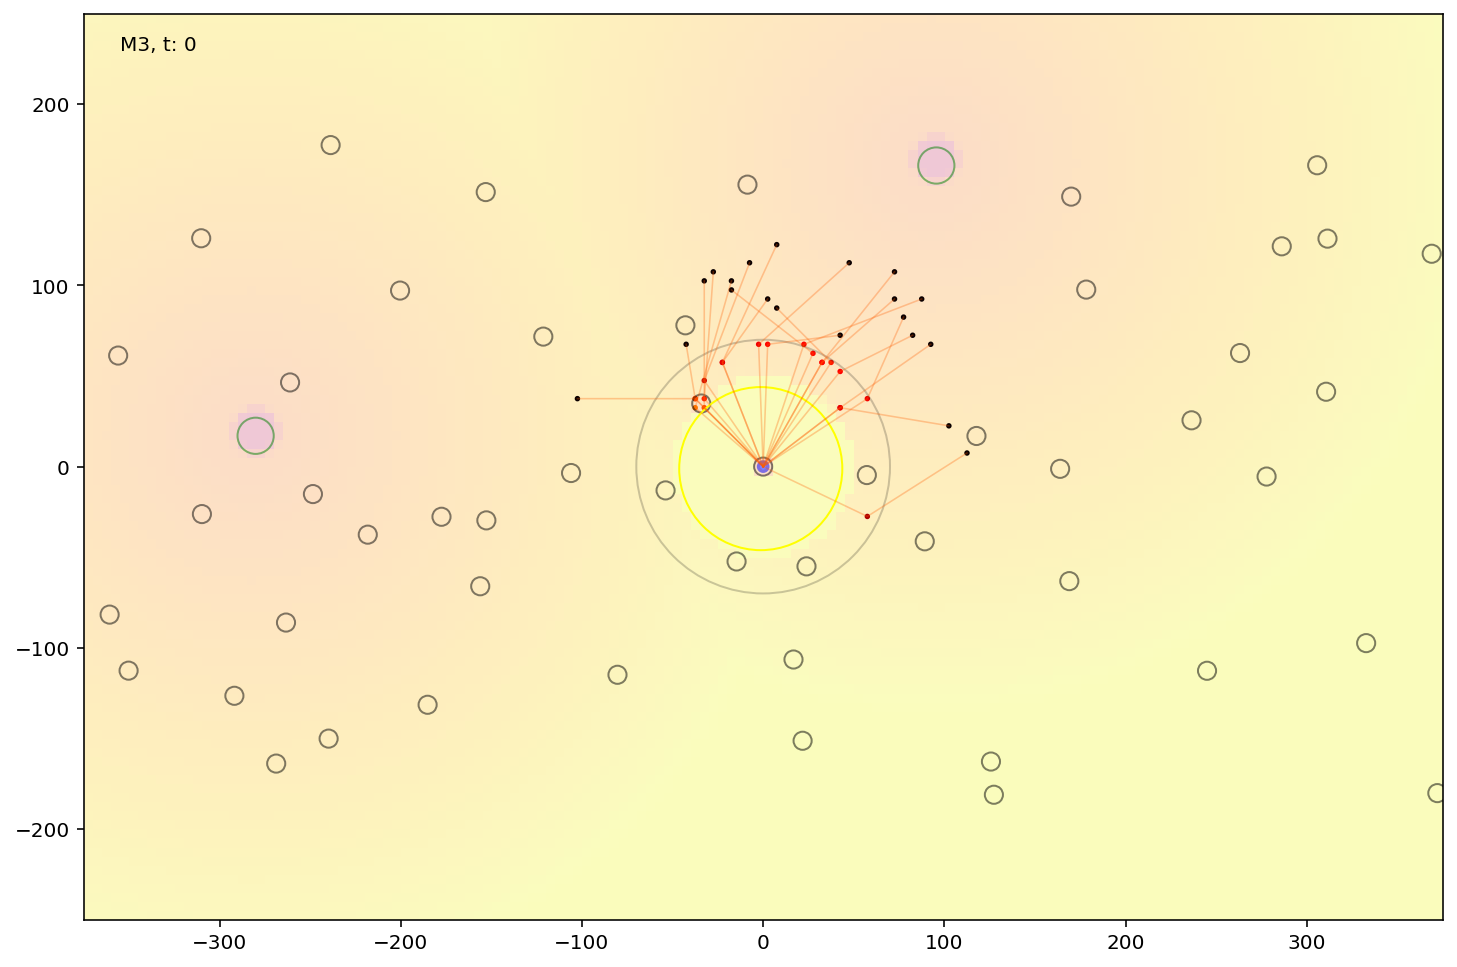

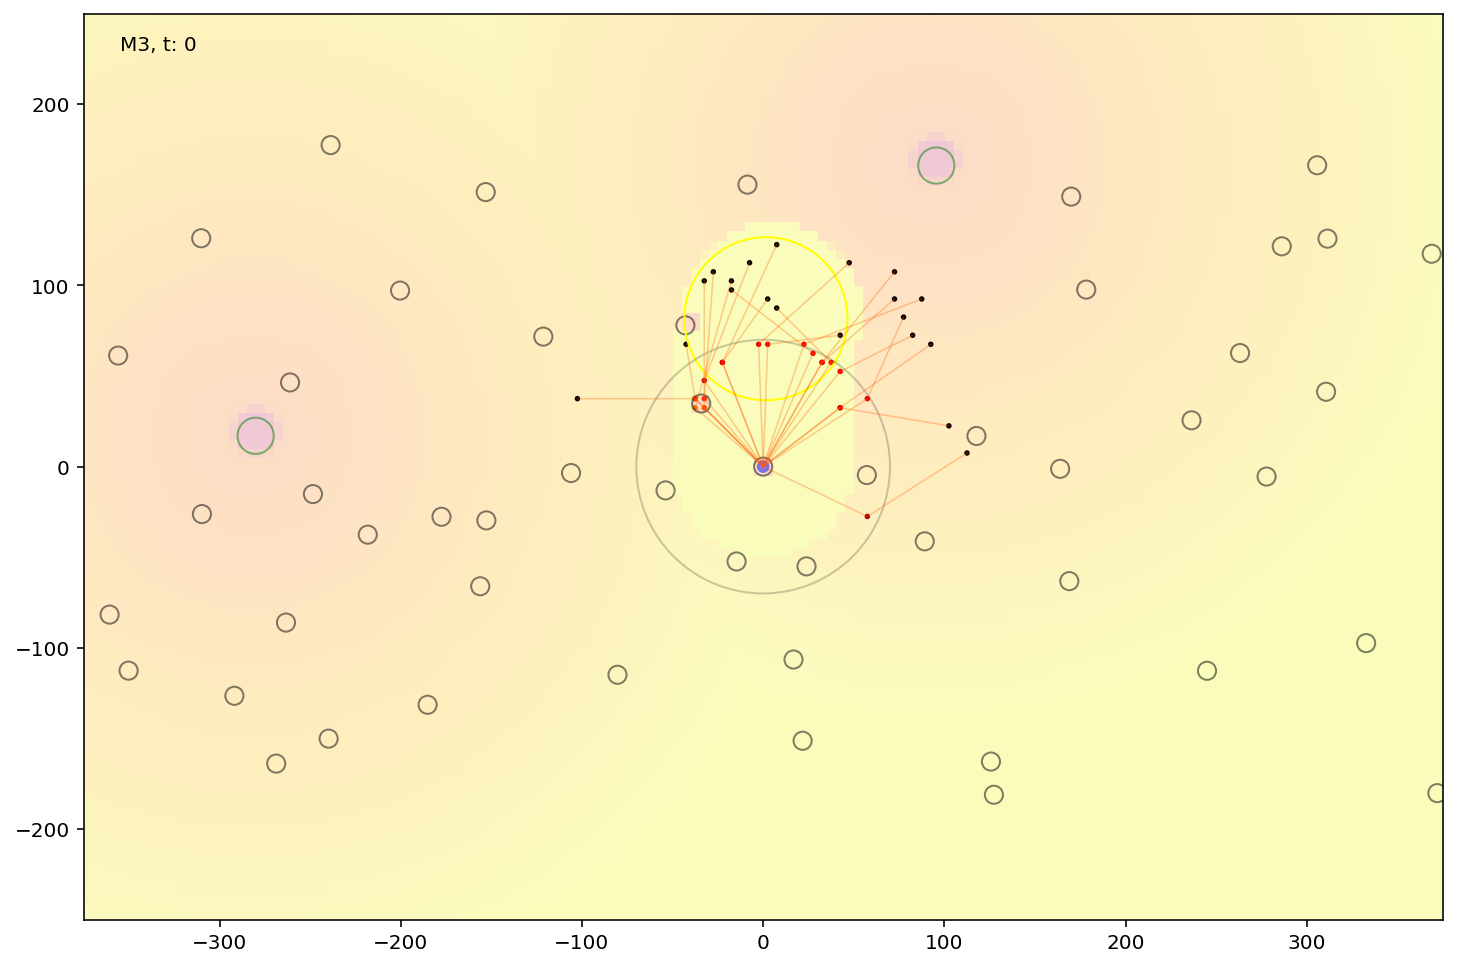

In [20]:
task = simulations.TaskRunner(map_id=3, T=1, verbose=True, agent_kwargs=agent_kwargs)
res = task.run(render_each=True, render_at_end=True)

## Batch Runs

In [ ]:
for map_id in MAP_IDS:
    batchrunner = simulations.MapBatchRunner(map_id=map_id, 
                                             batch_suffix="20210303",
                                             n=81, agent_kwargs=agent_kwargs)
    res = batchrunner.run()

## Param Tuning

In [ ]:
base_agent_kwargs = {
    'n_particles_step': 20,
    'particle_mass': 1.2,
    'sample_temperature': 0.03, 
    'init_goal_energy': 0.2,
    'init_hm_energy': 0.3,
    'learn_alpha': 0.2,
    'init_heatmap_type': 'prior',
    'policy_crit': 'theta_var',
    'step_conf_thresh': 0.7,
    'particle_discount': 0.2
}

experiments = [
    ('particle_mass', [1.0, 1.4]),
    ('step_conf_thresh', [np.pi/5, np.pi/4])
]

for map_id in MAP_IDS:
    tuner = simulations.Tuner(map_id=map_id, 
                              n_per_batch=10, 
                              base_agent_kwargs=base_agent_kwargs, 
                              experiments=experiments)
    res = tuner.run()
    print(res)